In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Load the csv file and check the first five rows of the dataset
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#dropping the unnecessary column 
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
X=df.drop(columns='sales')
y= df['sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4, test_size=0.3)
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [9]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr.coef_

array([0.04533392, 0.17715767, 0.00553852])

In [12]:
lr.intercept_

3.0906443641251133

In [13]:
X_test[:5]

,TV,radio,newspaper
11,214.7,24.0,4.0
99,135.2,41.7,45.9
128,220.3,49.0,3.2
175,276.9,48.9,41.8
1,44.5,39.3,45.1


In [14]:
y_pred_test = lr.predict(X_test)

In [15]:
y_pred_test[:5]

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724])

### Evaluation of Linear Regression model(MSE, RMSE, MAE)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"MSE is {mean_squared_error(y_test,y_pred_test)}")
print(f"RMSE is {mean_squared_error(y_test,y_pred_test, squared=False)}")
print(f"MAE is {mean_absolute_error(y_test,y_pred_test)}")

MSE is 2.223774667911558
RMSE is 1.4912326002041258
MAE is 1.211152512498049


In [17]:
#R2 score
# How much variance can be explained by the given features
print(f"R2-score is {r2_score(y_test,y_pred_test)}")

R2-score is 0.912722072959617


In [18]:
# Regularization of Linear Regression
#Lasso Regularization (L1)
# Tends to make the coefficients to absolute zero
# add the absolute vale of magnitude of coefficient as penalty term to loss function
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,y_train)
y_pred_test = las.predict(X_test)
print(f"R2-score is {r2_score(y_test,y_pred_test)}")

R2-score is 0.9112250903194143


In [19]:
# Ridge Regularization (L2)
# Add squared magnitude of coefficients as penalty term for the loss funtion
# Result in never set the value of coefficients to absolute zero
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_test = las.predict(X_test)
print(f"R2-score is {r2_score(y_test,y_pred_test)}")

R2-score is 0.9112250903194143


In [20]:
# ElasticNet Regularization (L1 + L2)
# Add squared magnitude of coefficients as penalty term for the loss funtion
# Result in never set the value of coefficients to absolute zero
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred_test = elasticnet.predict(X_test)
print(f"R2-score is {r2_score(y_test,y_pred_test)}")

R2-score is 0.9117469302155122


In [21]:
# Assumptions of Linear Regression
# Linear relationship between feature and target
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


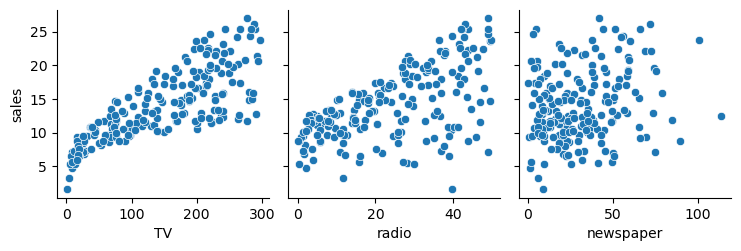

In [22]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars=['sales'])
plt.show()

In [23]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [24]:
# mean residuals = 0
residual = (y_test - y_pred_test)
np.mean(residual)

-0.07559702903921871

/var/folders/01/b5x3fw5s02v_bktqct0c1hkw0000gn/T/ipykernel_49502/408193164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


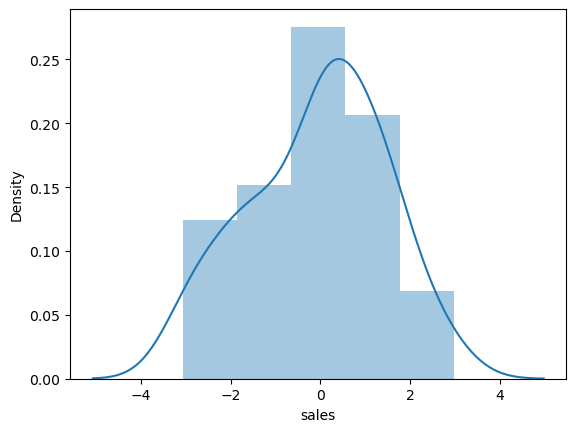

In [25]:
# Normal distribution of error terms
sns.distplot(residual)
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
def vif_score(X):
    X_arr = X.values
    vif = [variance_inflation_factor(X_arr,i) for i in range(X.shape[1]) ]
    vif_score = pd.DataFrame()
    vif_score['vif_score'] = vif
    vif_score['Features'] = X.columns
    return vif_score

In [28]:
vif_score(X)

,vif_score,Features
0,2.486772,TV
1,3.285462,radio
2,3.055245,newspaper
